# <Font color = 'pickle'>**Load Libraries/Install Software**

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install torchtext --upgrade
    !pip install torchmetrics
    !pip install swifter

    basepath = '/content/drive/MyDrive'
    sys.path.append('/content/drive/MyDrive/NaturalLanguageprocessing/custom_functions')

else:
    basepath = '/home/prince/Insync/google_drive_shaannoor/data'
    sys.path.append(
        '/home/prince/Insync/google_drive_shaannoor/data/custom-functions')

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=08969123854bf412bbda30556155c2e44c6f4e7d2e074f3bb3efe9a6932391d3
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
# Importing the necessary libraries

from torchmetrics.classification import MultilabelAccuracy, MultilabelHammingDistance
import torch.nn as nn
import torch.nn.functional as F

import torchmetrics
from  torchmetrics.functional.classification import multilabel_f1_score, multilabel_hamming_distance

import joblib
import swifter
import ast

from types import SimpleNamespace
from functools import partial
from pathlib import Path
import sys
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer as mlb

# <Font color = 'pickle'>**Specify Project Folders**

In [ ]:
base_folder = Path(basepath)
data_folder = base_folder/'Data'/'df_multilabel_cleaned.joblib'
model_folder = base_folder/'Data'/'Models'

In [ ]:
model_folder.mkdir(exist_ok=True)

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/NaturalLanguageprocessingClass/custom_functions']

In [ ]:
from Trainer_multilabel import Trainer
from data_preparation_multilabel import *
from ff_3_layer_sequential_model import MLPCustom

# <font color = 'pickle'> **SubSet Stack Exchange**
<font color = 'green'>This data is a subset of data from  Kaggle Competition </font>(https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data).
<br><br>
<font color = 'green'>The given dataset actually contains the different questions asked in the StackExchange website for various technical domains. We have fetched only those question that contains the top 10 individual tags. Each question can have multiple tags. **This means that this is a multi-label classification problem.** These are the ten categories for tags in the data. </font>
    

| Tag    | Language|
| -------| --------|
| 0      | c#      |
| 1      | jave    |
| 2      | php     |
| 3      | javascript|
| 4      | android |
| 5      | jquery  |
| 6      | c++     |
| 7      | python  |
| 8      | asp.net |

##  <Font color = 'pickle'>**Data Processing**

In [ ]:
# need to run only once, students are provided teh file with cleaned dataset
# df = joblib.load(data_folder/'df_multilabel_hw.joblib')
# df['combined_text'] = df.apply(lambda x: str(
#     x['Title']) + ' ' + str(x['Body']), axis=1)
# cleaned_text_lemma_stop_removal = cp.SpacyPreprocessor(model = 'en_core_web_lg',
#                                     lammetize=True,
#                                     lower=True,
#                                     remove_stop=True,
#                                     batch_size=5000).transform(df['combined_text'].values)
# df['cleaned_text'] = cleaned_text_lemma_stop_removal
# df_hw_cleaned = df[['cleaned_text', 'Tags', 'Tag_Number']]
# df_hw_cleaned
# file = data_folder/'df_multilabel_hw_cleaned.joblib'
# joblib.dump(df_hw_cleaned, file)

In [ ]:
file = data_folder
df = joblib.load(file); df

,cleaned_text,Tags,Tag_Number
0,asp query stre dropdown webpage follow control...,c# asp.net,"[0, 9]"
1,run javascript code server java code want run ...,java javascript,"[1, 3]"
2,linq sql throw exception row find change hi li...,c# asp.net,"[0, 9]"
3,run python script php server run nginx web ser...,php python,"[2, 7]"
4,advice write function m try write function res...,javascript jquery,"[3, 5]"
...,...,...,...
47422,take value edittext put decimal point all- wor...,java android,"[1, 4]"
47423,listen phone state application nee liste phone...,java android,"[1, 4]"
47424,android ui thread thread task want access main...,java android,"[1, 4]"
47425,dynamic table row creation html javascript htm...,asp.net javascript,"[9, 3]"


In [ ]:
X = df['cleaned_text'].values
y = df['Tag_Number'].values
print(type(X), type(y))
print(y.dtype)
print(X.dtype)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
object
object


In [ ]:
print(eval('3*2'))
try:
    print(ast.literal_eval('3*2'))
except:
    print("An exception occurred")

6
An exception occurred


In [ ]:
print(eval('[3,2]'))
print(ast.literal_eval('[3,2]'))

[3, 2]
[3, 2]


In [ ]:
df['Tag_Number_list'] = df['Tag_Number'].swifter.apply(lambda x: ast.literal_eval(x))
df

Pandas Apply:   0%|          | 0/47427 [00:00<?, ?it/s]

,cleaned_text,Tags,Tag_Number,Tag_Number_list
0,asp query stre dropdown webpage follow control...,c# asp.net,"[0, 9]","[0, 9]"
1,run javascript code server java code want run ...,java javascript,"[1, 3]","[1, 3]"
2,linq sql throw exception row find change hi li...,c# asp.net,"[0, 9]","[0, 9]"
3,run python script php server run nginx web ser...,php python,"[2, 7]","[2, 7]"
4,advice write function m try write function res...,javascript jquery,"[3, 5]","[3, 5]"
...,...,...,...,...
47422,take value edittext put decimal point all- wor...,java android,"[1, 4]","[1, 4]"
47423,listen phone state application nee liste phone...,java android,"[1, 4]","[1, 4]"
47424,android ui thread thread task want access main...,java android,"[1, 4]","[1, 4]"
47425,dynamic table row creation html javascript htm...,asp.net javascript,"[9, 3]","[9, 3]"


In [ ]:
t=list(df[['cleaned_text']].values)

In [ ]:
y_final = df['Tag_Number_list'].values

In [ ]:
y_one_hot = mlb().fit_transform(y_final)
y_one_hot

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y_one_hot, test_size = 0.40, random_state=42)

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.50, random_state=42)

In [ ]:
print(len(X_train), len(X_valid), len(X_test))

28456 9485 9486


In [ ]:
y_train.shape

(28456, 10)

## <Font color = 'pickle'>**Custom Dataset Class**

In [ ]:
trainset = CustomDataset(X_train, y_train)
validset = CustomDataset(X_valid, y_valid)

## <Font color = 'pickle'>**Create Vocab**

In [ ]:
stack_vocab = get_vocab(trainset, min_freq=3)

In [ ]:
len(stack_vocab)

43065

# <Font color = 'pickle'>**Meta Data**

In [ ]:
hyperparameters = SimpleNamespace(
    # model Parameters
    EMBED_DIM=300,
    VOCAB_SIZE=len(stack_vocab),
    OUTPUT_DIM=10,
    HIDDEN_DIM1=200,
    HIDDEN_DIM2=100,
    NON_LINEARITY=F.relu,

    # training
    EPOCHS=5,
    BATCH_SIZE=128,
    LEARNING_RATE=0.001,
    WEIGHT_DECAY=0.000,
    CLIP_TYPE = 'value',
    CLIP_VALUE = 10,
    PATIENCE=5,
    MOMENTUM=0,
)

# <Font color = 'pickle'>**Trainer Configuration**

In [ ]:
# Fix seed value
Trainer.set_seed()

collate_fn = partial(collate_batch, vocab=stack_vocab)

# Data Loader
train_loader, valid_loader = get_loaders(trainset, validset, batch_size_= hyperparameters.BATCH_SIZE,
                                         collate_fn=collate_fn)

# cross entropy loss function
loss_function = nn.BCEWithLogitsLoss()

# model
model = MLPCustom(hyperparameters.EMBED_DIM,
                       hyperparameters.VOCAB_SIZE,
                       hyperparameters.HIDDEN_DIM1,
                       hyperparameters.HIDDEN_DIM2,
                       hyperparameters.OUTPUT_DIM,
                       hyperparameters.NON_LINEARITY)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)


# apply initialization recursively  to all modules
model.apply(init_weights)

# Intialize stochiastic gradient descent optimizer
optimizer = torch.optim.Adam(model.parameters(),
                             lr=hyperparameters.LEARNING_RATE,
                             weight_decay=hyperparameters.WEIGHT_DECAY,
                             )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# <Font color = 'pickle'>**Training Model**

In [ ]:
trainer = Trainer(model=model, optimizer=optimizer,
                  criterion=loss_function, device=device)

In [ ]:
run_folder = model_folder/'rev0'
run_folder.mkdir(exist_ok=True)

# set loaders
trainer.set_loaders(train_loader, valid_loader)

# set metric -- OPTIONAL
train_metric = MultilabelHammingDistance(num_labels=10)
valid_metric = MultilabelHammingDistance(num_labels=10)
trainer.set_metric(train_metric.to(device), valid_metric.to(device))

# set checkpoint -- OPTIONAL
trainer.set_checkpoint(save_path=run_folder,
                       save_best=True, save_every_n_epochs=5, save_last_epoch=True)

# set early stopping -- OPTIONAL
trainer.set_early_stopping(patience = hyperparameters.PATIENCE)

# set gradient Clipping  -- OPTIONAL
trainer.set_gradient_clipping(hyperparameters.CLIP_TYPE, hyperparameters.CLIP_VALUE, norm_type=2)

In [ ]:
trainer.sanity_check(num_classes=2)

/content/drive/MyDrive/NaturalLanguageprocessingClass/custom_functions/data_preparation_HW6.py:58: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  labels = torch.tensor(labels, dtype=torch.float64)


Actual loss: 0.6739880220702616
Expected Theoretical loss: 0.6931471805599453


In [ ]:
trainer.train(num_epochs=hyperparameters.EPOCHS, multilabel=True)

Epoch 1/5 - Train Loss: 0.5693, Train Metric: 0.2672, Train Time: 0:00:04.582915
Epoch 1/5 - Val Loss: 0.2378, Val Metric: 0.0753, Val Time: 0:00:00.937724

Epoch 2/5 - Train Loss: 0.2304, Train Metric: 0.0815, Train Time: 0:00:04.433884
Epoch 2/5 - Val Loss: 0.1633, Val Metric: 0.0589, Val Time: 0:00:00.962646

Epoch 3/5 - Train Loss: 0.1749, Train Metric: 0.0622, Train Time: 0:00:04.655669
Epoch 3/5 - Val Loss: 0.1417, Val Metric: 0.0519, Val Time: 0:00:00.977459

Epoch 4/5 - Train Loss: 0.1499, Train Metric: 0.0533, Train Time: 0:00:04.589147
Epoch 4/5 - Val Loss: 0.1300, Val Metric: 0.0480, Val Time: 0:00:00.979647

Epoch 5/5 - Train Loss: 0.1344, Train Metric: 0.0475, Train Time: 0:00:04.617987
Epoch 5/5 - Val Loss: 0.1201, Val Metric: 0.0439, Val Time: 0:00:01.080131



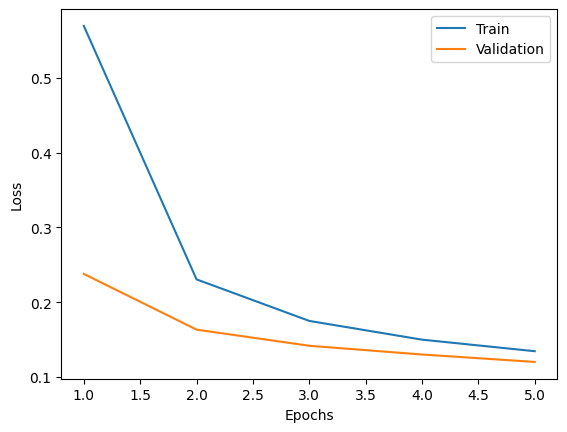

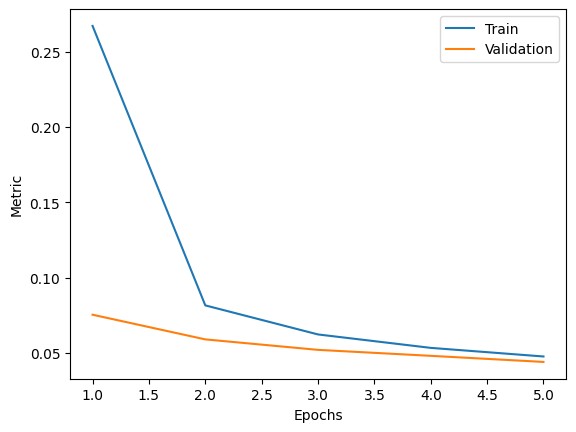

In [ ]:
trainer.plot_history()

In [ ]:
file = 'checkpoint_' + str(trainer.timestamp) + '_last.pt'
trainer.load_checkpoint(run_folder /file)

Loaded checkpoint from '/content/drive/MyDrive/Data/Models/rev0/checkpoint_2023-09-20_03-34-46_last.pt'.


In [ ]:
trainer.train(10, multilabel=True)

Epoch 1/10 - Train Loss: 0.1225, Train Metric: 0.0435, Train Time: 0:00:04.598529
Epoch 1/10 - Val Loss: 0.1138, Val Metric: 0.0410, Val Time: 0:00:00.971946

Epoch 2/10 - Train Loss: 0.1110, Train Metric: 0.0396, Train Time: 0:00:04.769830
Epoch 2/10 - Val Loss: 0.1090, Val Metric: 0.0393, Val Time: 0:00:00.987539

Epoch 3/10 - Train Loss: 0.1020, Train Metric: 0.0367, Train Time: 0:00:04.615667
Epoch 3/10 - Val Loss: 0.1070, Val Metric: 0.0386, Val Time: 0:00:00.967289

Epoch 4/10 - Train Loss: 0.0940, Train Metric: 0.0337, Train Time: 0:00:04.614185
Epoch 4/10 - Val Loss: 0.1029, Val Metric: 0.0365, Val Time: 0:00:00.916776

Epoch 5/10 - Train Loss: 0.0863, Train Metric: 0.0313, Train Time: 0:00:04.396944
Epoch 5/10 - Val Loss: 0.1014, Val Metric: 0.0357, Val Time: 0:00:00.930137

Epoch 6/10 - Train Loss: 0.0802, Train Metric: 0.0287, Train Time: 0:00:04.397858
Epoch 6/10 - Val Loss: 0.0994, Val Metric: 0.0345, Val Time: 0:00:01.023040

Epoch 7/10 - Train Loss: 0.0751, Train Metric:

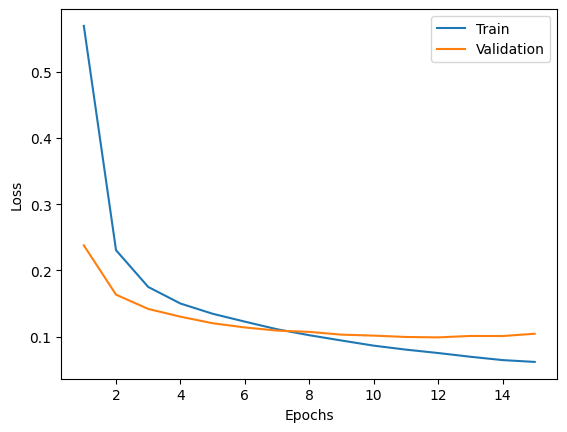

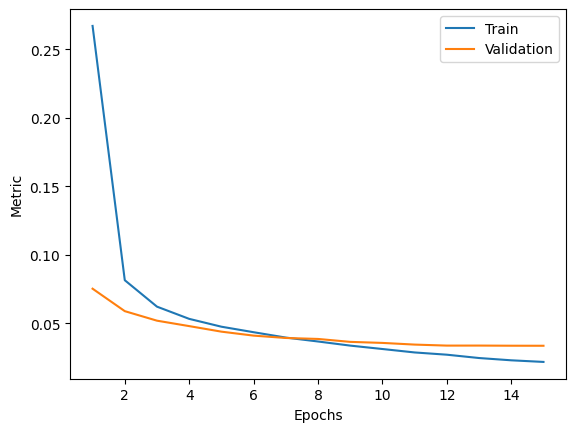

In [ ]:
trainer.plot_history()

# <Font color = 'pickle'>**Get Accuracy, Predictions**

In [ ]:
testset = CustomDataset(X_test, y_test)

In [ ]:
test_loader = get_test_loaders(testset, batch_size_=hyperparameters.BATCH_SIZE,
                               collate_fn=collate_fn)

In [ ]:
file = 'checkpoint_' + str(trainer.timestamp) + '_best.pt'
trainer.load_checkpoint(run_folder /file)

Loaded checkpoint from '/home/harpreet/Insync/google_drive_shaannoor/data/models/nlp_spring_2023/HW6/rev0/checkpoint_2023-04-12_21-36-27_best.pt'.


In [ ]:
# Get the prediction and accuracy for the test dataset

predictions_test, target_test = trainer.predict(
    test_loader, return_targets=True, multilabel=True)
predictions_train, target_train = trainer.predict(
    train_loader, return_targets=True, multilabel=True)
predictions_valid, target_valid = trainer.predict(
    valid_loader, return_targets=True, multilabel=True)


In [ ]:
metric = multilabel_hamming_distance
hd_train = metric(predictions_train, target_train, num_labels=10)
hd_valid = metric(predictions_valid, target_valid, num_labels=10)
hd_test = metric(predictions_test, target_test, num_labels=10)


In [ ]:
# Print Hammo=imng Distance
print('Test hamming distance', hd_test )
print('Train hamming distance', hd_train )
print('Valid hamming distance', hd_valid )

Test hamming distance tensor(0.0356)
Train hamming distance tensor(0.0156)
Valid hamming distance tensor(0.0335)


In [ ]:
metric = multilabel_f1_score
f1_train = metric(predictions_train, target_train, num_labels=10)
f1_valid = metric(predictions_valid, target_valid, num_labels=10)
f1_test = metric(predictions_test, target_test,num_labels=10)

# Print Test Accuracy
print('Test f1score', f1_test * 100)
print('Train f1score', f1_train * 100)
print('Valid f1score', f1_valid * 100)


Test f1score tensor(82.4385)
Train f1score tensor(88.4685)
Valid f1score tensor(81.4209)


In [ ]:
print(f1_score(predictions_test.numpy(), target_test.numpy(), average='macro') * 100)
print(f1_score(predictions_train.numpy(), target_train.numpy(), average='macro') * 100)
print(f1_score(predictions_valid.numpy(), target_valid.numpy(), average='macro') * 100)


82.43848771756163
88.46853676325667
81.42085462198656


In [ ]:
from torchmetrics.functional.classification import multilabel_accuracy

In [ ]:
metric = multilabel_accuracy
acc_train = metric(predictions_train, target_train, num_labels=10)
acc_valid = metric(predictions_valid, target_valid, num_labels=10)
acc_test = metric(predictions_test, target_test, num_labels=10)


In [ ]:
# Print Hammo=imng Distance
print('Test accuracy', acc_test)
print('Train accuracy', acc_train)
print('Valid accuracy', acc_valid)


Test accuracy tensor(0.9644)
Train accuracy tensor(0.9844)
Valid accuracy tensor(0.9665)


In [ ]:
print('Test accuracy', 1- acc_test)
print('Train accuracy', 1- acc_train)
print('Valid accuracy', 1- acc_valid)


Test accuracy tensor(0.0356)
Train accuracy tensor(0.0156)
Valid accuracy tensor(0.0335)
